In [1]:
path='/content/drive/My Drive/Data'

In [2]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
import dlib

In [3]:
# Get Image names stored in "Images" folder
image_path_names=[]
person_names=set()
for file_name in glob.glob(path+'/Training_Set/*_[1-9]*.png'):
  image_path_names.append(file_name)
  person_names.add(image_path_names[-1].split('/')[-1].split('_')[0])

In [4]:
len(image_path_names)


100

In [5]:
! wget http://dlib.net/files/mmod_human_face_detector.dat.bz2

--2021-03-20 18:40:11--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K  1.24MB/s    in 0.5s    

2021-03-20 18:40:12 (1.24 MB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]



In [6]:
!bzip2 -dk mmod_human_face_detector.dat.bz2

In [7]:
%rm mmod_human_face_detector.dat.bz2

In [ ]:
os.mkdir(path+'/Train_cropped/')

In [ ]:
# For each person create a separate folder
for person in person_names:
  os.mkdir(path+'/Train_cropped/'+person+'/')

In [8]:
%rm mmod_human_face_detector.dat.bz2
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

rm: cannot remove 'mmod_human_face_detector.dat.bz2': No such file or directory


In [ ]:
# Detect face, crop detected face and save them in corresponding person folder
for file_name in image_path_names:
  img=cv2.imread(file_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
  width=right-left
  height=bottom-top
  img_crop=img[top:top+height,left:left+width]
  img_path=path+'/Train_cropped/'+file_name.split('/')[-1].split('_')[0]+'/'+file_name.split('/')[-1]
  cv2.imwrite(img_path,img_crop)

In [9]:
# Get Image names for testing
test_image_path_names=[]
for file_name in glob.glob(path+'/Testing_Set/*_[12].png'):
  test_image_path_names.append(file_name)

In [10]:
len(test_image_path_names)

20

In [ ]:
os.mkdir(path+'/Test_cropped/')

In [ ]:
# Create Separate folder for each person in "Test_Images_crop" folder
for person in person_names:
  os.mkdir(path+'/Test_cropped/'+person+'/')

In [ ]:
# Detect face,crop face and save in corresponding folder
for file_name in test_image_path_names:
  img=cv2.imread(file_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
  width=right-left
  height=bottom-top
  img_crop=img[top:top+height,left:left+width]
  img_path=path+'/Test_cropped/'+file_name.split('/')[-1].split('_')[0]+'/'+file_name.split('/')[-1]
  cv2.imwrite(img_path,img_crop)

In [13]:
! pip install gdown

In [ ]:
#Download pre-trained vgg-face-model-weights as .h5 file
! gdown https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo

In [ ]:
! pip install tensorflow==2.0.0

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

In [12]:
#Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [13]:
# Load VGG Face model weights
model.load_weights('/content/drive/MyDrive/Copy of vgg_face_weights.h5')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [15]:
# Remove Last Softmax layer and get model upto last flatten layer with outputs 2622 units
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

In [16]:
#Prepare Training Data
x_train=[]
y_train=[]
person_folders=os.listdir(path+'/Train_cropped')
person_rep=dict()
for i,person in enumerate(person_folders):
  person_rep[i]=person
  image_names = [f for f in os.listdir(path+'/Train_cropped/'+person+'/')]
  #image_names = [i for i in image_names if os.path.isfile(i)]   
  image_names = np.sort(image_names)[1:]
  print(image_names)
  for image_name in image_names:
    img=load_img(path+'/Train_cropped/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_train.append(np.squeeze(K.eval(img_encode)).tolist())
    y_train.append(i)

['Macron_1.png' 'Macron_10.png' 'Macron_2.png' 'Macron_3.png'
 'Macron_4.png' 'Macron_5.png' 'Macron_6.png' 'Macron_7.png'
 'Macron_8.png' 'Macron_9.png']
['Brazil_1.png' 'Brazil_10.png' 'Brazil_2.png' 'Brazil_3.png'
 'Brazil_4.png' 'Brazil_5.png' 'Brazil_6.png' 'Brazil_7.png'
 'Brazil_8.png' 'Brazil_9.png']
['Ram_1.png' 'Ram_10.png' 'Ram_2.png' 'Ram_3.png' 'Ram_4.png' 'Ram_5.png'
 'Ram_6.png' 'Ram_7.png' 'Ram_8.png' 'Ram_9.png']
['Italy_1.png' 'Italy_10.png' 'Italy_2.png' 'Italy_3.png' 'Italy_4.png'
 'Italy_5.png' 'Italy_6.png' 'Italy_7.png' 'Italy_8.png' 'Italy_9.png']
['Frank_1.png' 'Frank_10.png' 'Frank_2.png' 'Frank_3.png' 'Frank_4.png'
 'Frank_5.png' 'Frank_6.png' 'Frank_7.png' 'Frank_8.png' 'Frank_9.png']
['Boris_1.png' 'Boris_10png.png' 'Boris_2.png' 'Boris_3.png' 'Boris_4.png'
 'Boris_5.png' 'Boris_6.png' 'Boris_7.png' 'Boris_8.png' 'Boris_9.png']
['Xi_1.png' 'Xi_10.png' 'Xi_2.png' 'Xi_3.png' 'Xi_4.png' 'Xi_5.png'
 'Xi_6.png' 'Xi_7.png' 'Xi_8.png' 'Xi_9.png']
['Justin_1.png' '

In [17]:
person_rep

{0: 'Macron',
 1: 'Brazil',
 2: 'Ram',
 3: 'Italy',
 4: 'Frank',
 5: 'Boris',
 6: 'Xi',
 7: 'Justin',
 8: 'Joe',
 9: 'Japan'}

In [18]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [19]:
#Prepare Test Data
x_test=[]
y_test=[]
person_folders=os.listdir(path+'/Test_cropped/')
for i,person in enumerate(person_folders):
  image_names = [f for f in os.listdir(path+'/Test_cropped/'+person+'/')]
  #image_names = [i for i in image_names if os.path.isfile(i)]
  #if '.ipynb_checkpoints' in image_names:
    #image_names = image_names.remove('.ipynb_checkpoints')
  image_names = np.sort(image_names)[1:]
  print(image_names)
  for image_name in image_names:
    img=load_img(path+'/Test_cropped/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_test.append(np.squeeze(K.eval(img_encode)).tolist())
    y_test.append(i)

['Brazil_1.png' 'Brazil_2.png']
['Italy_1.png' 'Italy_2.png']
['Macron_1.png' 'Macron_2.png']
['Justin_1.png' 'Justin_2.png']
['Xi_1.png' 'Xi_2.png']
['Frank_1.png' 'Frank_2.png']
['Boris_1.png' 'Boris_2.png']
['Ram_1.png' 'Ram_2.png']
['Japan_1.png' 'Japan_2.png']
['Joe_1.png' 'Joe_2.png']


In [20]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [21]:
# Save test and train data for later use
np.save('train_data',x_train)
np.save('train_labels',y_train)
np.save('test_data',x_test)
np.save('test_labels',y_test)

In [22]:
# Load saved data
x_train=np.load('train_data.npy')
y_train=np.load('train_labels.npy')
x_test=np.load('test_data.npy')
y_test=np.load('test_labels.npy')

In [23]:
x_train.shape

(100, 2622)

In [51]:
# Softmax regressor to classify images based on encoding 
classifier_model=Sequential()
classifier_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=10,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

In [52]:
history = classifier_model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
4/4 [==============================] - 1s 55ms/step - loss: 2.2463 - accuracy: 0.3833 - val_loss: 3.9811 - val_accuracy: 0.1500
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1968 - accuracy: 1.0000 - val_loss: 4.8707 - val_accuracy: 0.0500
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0764 - accuracy: 0.9899 - val_loss: 5.4870 - val_accuracy: 0.0500
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0523 - accuracy: 1.0000 - val_loss: 5.6623 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0368 - accuracy: 1.0000 - val_loss: 5.7509 - val_accuracy: 0.0500
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 5.9341 - val_accuracy: 0.0500
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 6.0475 - val_accuracy: 0.0500
Epoch 8/100
4/4 

In [40]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	plt.legend()
	#filename = sys.argv[0].split('/')[-1]
	#plt.savefig(filename + '_plot.png')
	plt.show()

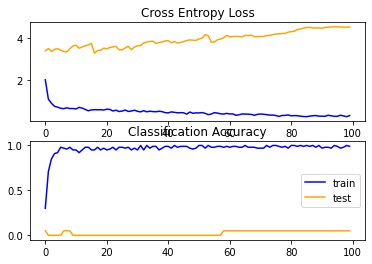

In [41]:
summarize_diagnostics(history)

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization
[[10  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0 10]]
None


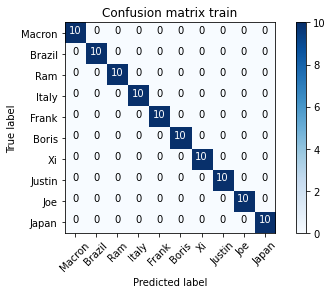

In [53]:
from sklearn.metrics import confusion_matrix
import itertools
rep = ['Macron',
  'Brazil',
  'Ram',
  'Italy',
  'Frank',
  'Boris',
  'Xi',
  'Justin',
  'Joe',
  'Japan']
yhat_train = classifier_model.predict_classes(x_train)
cnf_matrix = confusion_matrix(y_train, yhat_train)
print(plot_confusion_matrix(cnf_matrix, classes=rep, normalize= False,  title='Confusion matrix train'))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization
[[0 2 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 2 0]]
None


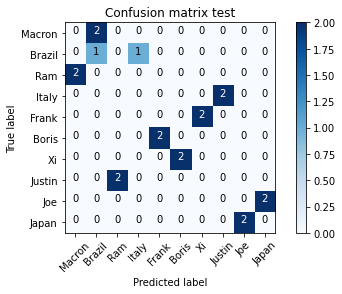

In [54]:
yhat_test = classifier_model.predict_classes(x_test)
cnf_matrix = confusion_matrix(y_test, yhat_test)
print(plot_confusion_matrix(cnf_matrix, classes=rep, normalize= False,  title='Confusion matrix test'))

In [33]:
# Save model for later use
tf.keras.models.save_model(classifier_model,'/content/drive/My Drive/Presidents.h5')

In [45]:
# Load saved model
classifier_model=tf.keras.models.load_model('/content/drive/My Drive/President.h5')

In [46]:
# Path to folder which contains images to be tested and predicted
test_images_path=path+'/Predictions/'

In [ ]:
os.mkdir(path+'/results')

In [47]:
# Label names for class numbers
person_rep={0: 'Macron',
 1: 'Brazil',
 2: 'Ram',
 3: 'Italy',
 4: 'Frank',
 5: 'Boris',
 6: 'Xi',
 7: 'Justin',
 8: 'Joe',
 9: 'Japan'}

In [48]:
def plot(img):
  plt.figure(figsize=(8,4))
  plt.imshow(img[:,:,::-1])
  plt.show()

In [49]:
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

joeandmacron.png
mmod_rectangles[[(480, 68) (621, 210)], [(117, 70) (235, 188)]]


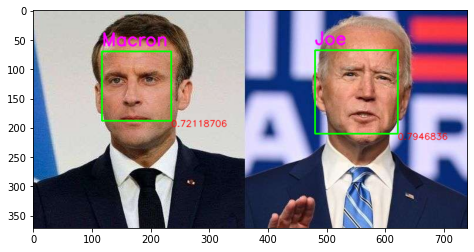

In [50]:
for img_name in os.listdir(path+'/Predictions/'):
  #if img_name=='both.png':
    #continue
  print(img_name)
  # Load Image
  img=cv2.imread(path+'/Predictions/'+img_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Detect Faces
  rects=dnnFaceDetector(gray,1)
  print(rects)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    # Extract Each Face
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
    width=right-left
    height=bottom-top
    img_crop=img[top:top+height,left:left+width]
    cv2.imwrite(path+'/Predictions/both.png',img_crop)
    
    # Get Embeddings
    crop_img=load_img(path+'/Predictions/both.png',target_size=(224,224))
    crop_img=img_to_array(crop_img)
    crop_img=np.expand_dims(crop_img,axis=0)
    crop_img=preprocess_input(crop_img)
    img_encode=vgg_face(crop_img)

    # Make Predictions
    embed=K.eval(img_encode)
    person=classifier_model.predict(embed)
    name=person_rep[np.argmax(person)]
    os.remove(path+'/Predictions/both.png')
    cv2.rectangle(img,(left,top),(right,bottom),(0,255,0), 2)
    img=cv2.putText(img,name,(left,top-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2,cv2.LINE_AA)
    img=cv2.putText(img,str(np.max(person)),(right,bottom+10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
  # Save images with bounding box,name and accuracy 
  cv2.imwrite(path+'/results/'+img_name,img)
  plot(img)